### Importing neccessary libary

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import kernels,GaussianProcessRegressor

import math

from sklearn.preprocessing import StandardScaler



### Imoporting data from `ucimlrepo`

In [2]:

# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# metadata 
print(automobile.metadata) 
  
# variable information 
print(automobile.variables) 

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'published_in': 'Cement and Concrete Res

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

### EDA

In [5]:
# Fetch dataset
# automobile = fetch_ucirepo(id=10)

In [6]:
# Convert features and targets to numeric values
features_df = pd.DataFrame(concrete_compressive_strength.data.features)
targets_df = pd.DataFrame(concrete_compressive_strength.data.targets)

targets_df.head(10)

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
5,47.03
6,43.70
7,36.45
8,45.85
9,39.29


In [7]:
# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the data and transform it
# features_df = pd.DataFrame(scaler.fit_transform(features_df))
# targets_df = pd.DataFrame(scaler.fit_transform(targets_df))
# features_df.head(10)

### Convert data to numberic numbers

In [8]:
X = features_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
y = targets_df.apply(pd.to_numeric, errors='coerce').fillna(0)

X.head(10)

# len(X)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28


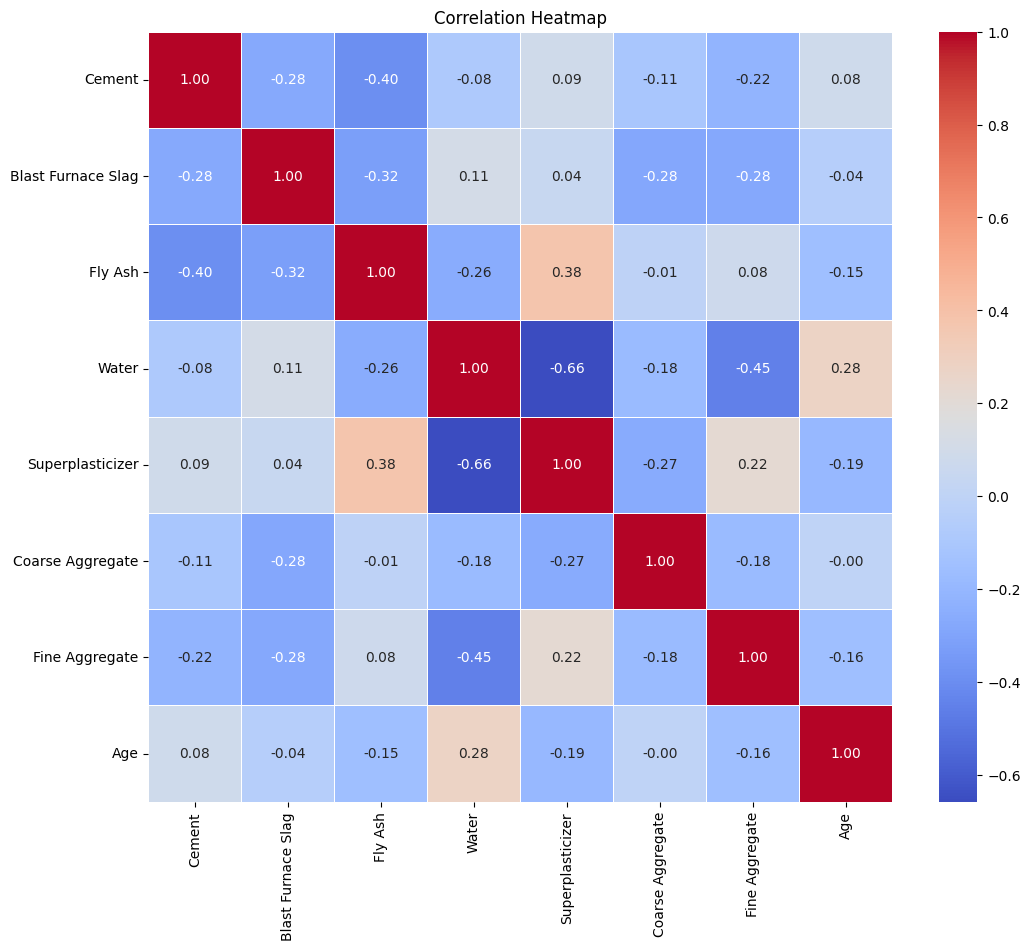

In [9]:
corr_matrix = X.corr()


# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Remove Highly correlated data

In [10]:
# Remove features with correlation higher than 0.65
high_correlation_features = corr_matrix[abs(corr_matrix) > 0.8]
high_correlation_features = high_correlation_features.stack().reset_index()
high_correlation_features = high_correlation_features[high_correlation_features['level_0'] != high_correlation_features['level_1']]
high_correlation_features

,level_0,level_1,0


In [11]:
# features_to_remove = ['city-mpg', 'engine-size', 'width', 'length','height', 'wheel-base']
# # Drop features with high correlation
# df_filtered = X.drop(columns=features_to_remove)

# df_filtered.head(10)

### Split data into training and testing sets

In [12]:
# X = df_filtered
# X = df_filtered.values
# y = y.values
# X_plot = X_plot.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# X_test

In [13]:
# X_train
# y_test.shape
# X_test.shape

In [14]:
# Define kernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel  = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

kernel

1**2 * RBF(length_scale=1)

In [15]:
np.random.seed(0)
n=50
 
kernel_ =[kernels.RBF (),
 
         kernels.RationalQuadratic(),
 
         kernels.ExpSineSquared(periodicity=10.0),
 
         kernels.Matern()
         ]
print(kernel_, '\n')

kernel_

[RBF(length_scale=1), RationalQuadratic(alpha=1, length_scale=1), ExpSineSquared(length_scale=1, periodicity=10), Matern(length_scale=1, nu=1.5)] 



[RBF(length_scale=1),
 RationalQuadratic(alpha=1, length_scale=1),
 ExpSineSquared(length_scale=1, periodicity=10),
 Matern(length_scale=1, nu=1.5)]

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Mean Squared error with 1**2 * RBF(length_scale=1) Kernel (1341.0967783582685)
Mean Absolute error with 1**2 * RBF(length_scale=1) Kernel (32.47610639248488)


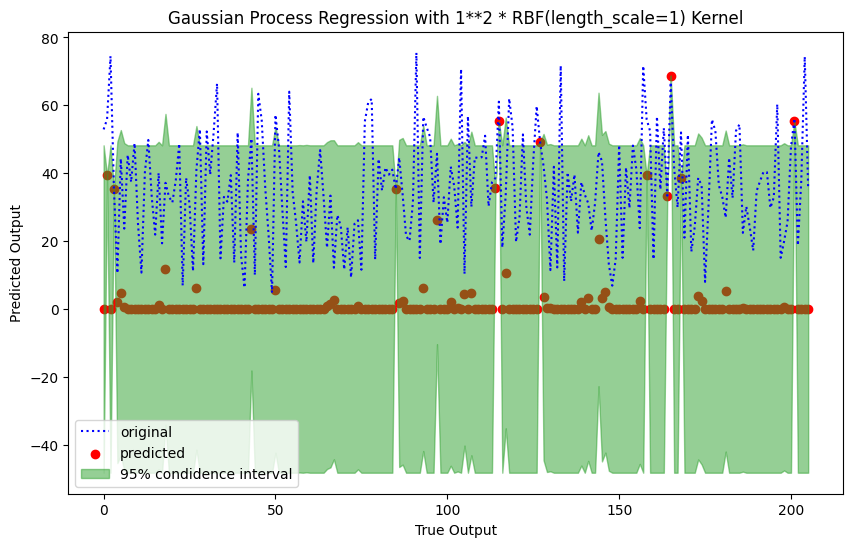

In [16]:
n_restarts_optimizer = 9
# for kernel in kernel_:
# Train Gaussian Process
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts_optimizer)
gaussian_process.fit(X_train, y_train)

X_test_copy = X_test.copy()
X_test_copy.reset_index(drop=True, inplace=True)

y_test_copy = y_test.copy()
y_test_copy.reset_index(drop=True, inplace=True)

# Evaluate model
y_pred, std = gaussian_process.predict(X_test_copy, return_std=True)

mse = mean_squared_error(y_test_copy, y_pred) 
print(f"Mean Squared error with {kernel} Kernel ({mse})")
mae = mean_absolute_error(y_test_copy, y_pred)
print(f"Mean Absolute error with {kernel} Kernel ({mae})")

# Visualize predictions and uncertainty
plt.figure(figsize=(10, 6))
plt.plot(y_test_copy.index, y_test_copy, c='b', label="original", linestyle = "dotted")
plt.scatter(y_test_copy.index, y_pred, c='r', label="predicted")
plt.fill_between(
        y_test_copy.index,
        y_pred - 1.96 * std,
        y_pred + 1.96 * std,
        alpha=0.5,
        label="95% condidence interval",
        color="tab:green",
    )
plt.xlabel("True Output")
plt.ylabel("Predicted Output")
plt.title(f"Gaussian Process Regression with {kernel} Kernel")
plt.legend()
plt.show()


### Linear Regression by Santhosh Gupta

Mean Squared error with 1**2 * RBF(length_scale=1) Kernel (95.97094009110684)
Mean Absolute error with 1**2 * RBF(length_scale=1) Kernel (7.745559243921435)


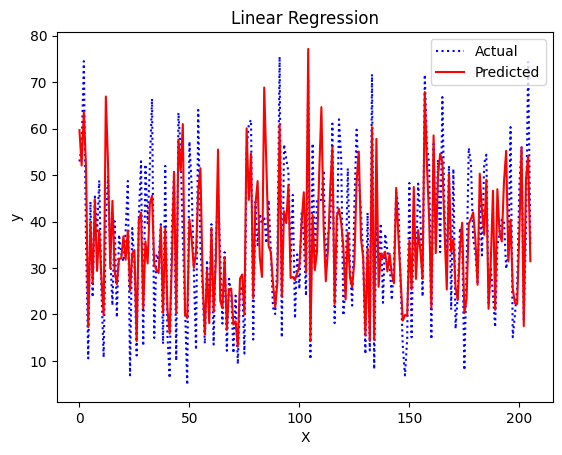

In [23]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test_copy)


mse = mean_squared_error(y_test_copy, y_pred) 
print(f"Mean Squared error with {kernel} Kernel ({mse})")
mae = mean_absolute_error(y_test_copy, y_pred)
print(f"Mean Absolute error with {kernel} Kernel ({mae})")


# Step 5: Plot the Data
plt.plot(X_test_copy.index, y_test_copy, color='blue', linestyle='dotted', label='Actual')  # Plot actual data points
plt.plot(X_test_copy.index, y_pred, color='red', label='Predicted')  # Plot regression line
plt.xlabel('X')  # Label for x-axis
plt.ylabel('y')  # Label for y-axis
plt.title('Linear Regression')  # Title of the plot
plt.legend()  # Show legend
plt.show()  # Display the plot

### BayesianRidge Classification by Bipluck Shrestha

Mean Squared error with Bayesian Regression (95.9959594781451)
Mean Absolute error with Bayesian Regression (7.733304752795433)


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


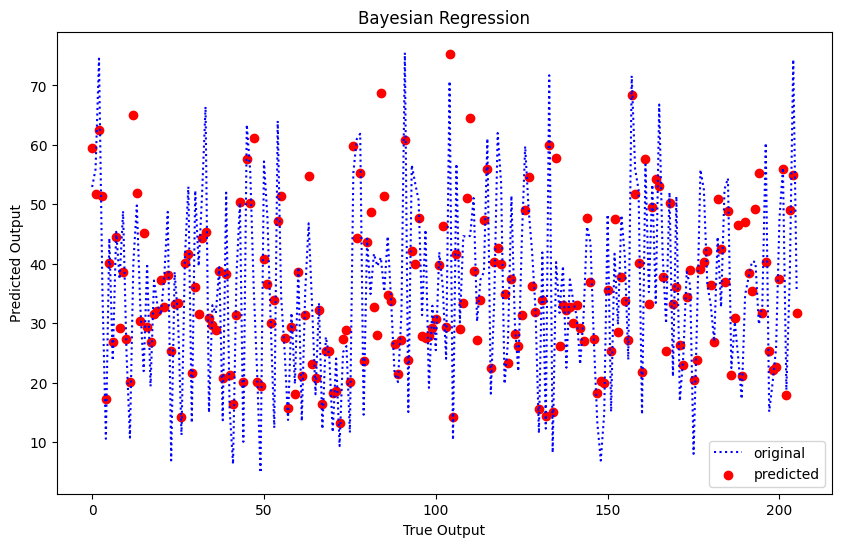

In [24]:

from sklearn.linear_model import BayesianRidge

# Train Bayesian Ridge Regression
bayesian_regression = BayesianRidge()

# Fit the model
bayesian_regression.fit(X_train, y_train)

# Evaluate model
y_pred = bayesian_regression.predict(X_test_copy)

mse = mean_squared_error(y_test_copy, y_pred)
print(f"Mean Squared error with Bayesian Regression ({mse})")
mae = mean_absolute_error(y_test_copy, y_pred)
print(f"Mean Absolute error with Bayesian Regression ({mae})")

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_copy.index, y_test_copy, c='b', label="original", linestyle = "dotted")
plt.scatter(y_test_copy.index, y_pred, c='r', label="predicted")
plt.xlabel("True Output")
plt.ylabel("Predicted Output")
plt.title("Bayesian Regression")
plt.legend()
plt.show()